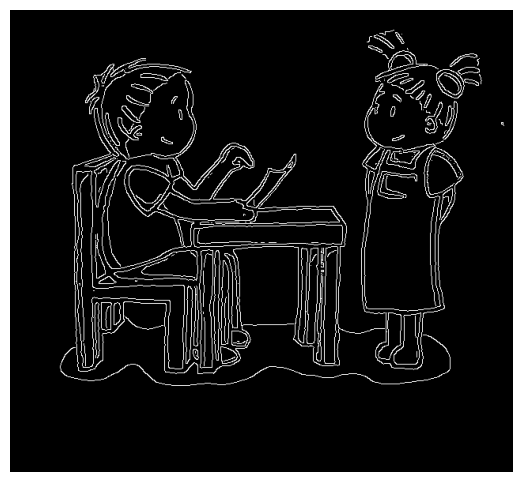

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the original image
image = cv2.imread('comic_orig_2.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, threshold1=7, threshold2=8)

# Display and save the result
plt.figure(figsize=(12, 6))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.savefig("comic_orig_2_edgemap.png", dpi=300, bbox_inches='tight')
plt.show()


In [16]:
# print(type(edges), edges.shape, "max:", np.max(edges), "min:", np.min(edges))
# print(edges)

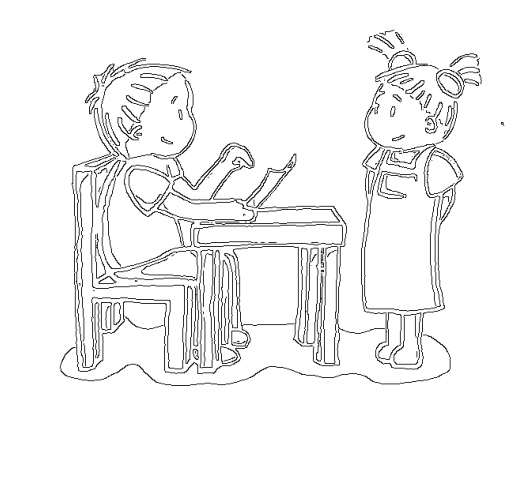

In [29]:
inverted_edge_map = np.zeros_like(edges)

for i in range(edges.shape[0]):
    for j in range(edges.shape[1]):
        if edges[i][j] == 0:
            inverted_edge_map[i][j] = 255
        else:
            inverted_edge_map[i][j] = 0

plt.figure(figsize=(12, 6))
plt.imshow(inverted_edge_map, cmap='gray')
plt.savefig("comic_orig_2_inverted_edgemap.png", dpi=300, bbox_inches='tight')
plt.axis('off')
plt.show()

In [18]:
# print(type(inverted_edge_map), inverted_edge_map.shape, "max:", np.max(inverted_edge_map), "min:", np.min(inverted_edge_map))
# print(inverted_edge_map)

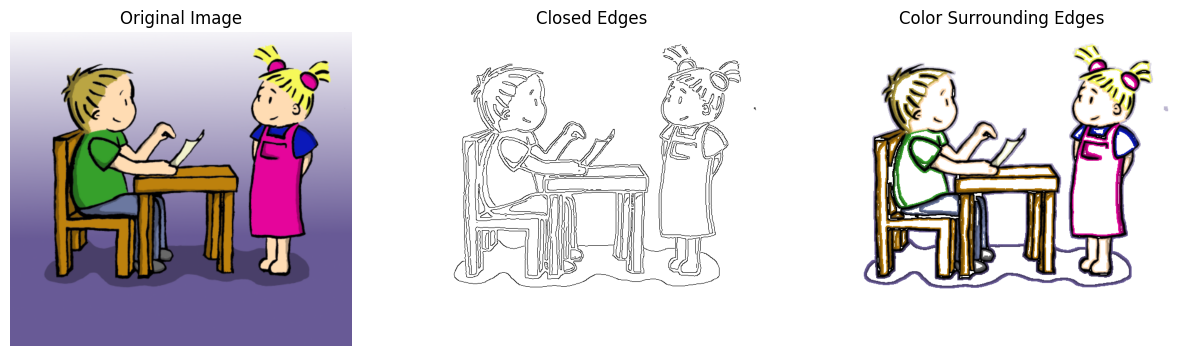

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def colorize_edges_manually(image, inverted_edge_map, kernel_size=5):
    # Initialize a blank canvas for the colored edges
    colorized_edges = np.zeros_like(image)
    colorized_edges += 255

    # Get half the kernel size
    k = kernel_size // 2

    # Iterate through the edge map
    for i in range(k, inverted_edge_map.shape[0] - k):
        for j in range(k, inverted_edge_map.shape[1] - k):
            # If it's an edge pixel
            if inverted_edge_map[i, j] == 0:
                # Extract the kernel region from the original image
                patch = image[i-k:i+k+1, j-k:j+k+1]
                # Fill the kernel region in the colorized edge map
                colorized_edges[i-k:i+k+1, j-k:j+k+1] = patch

    return colorized_edges

# Get the color edges and closed edges
colorized_edges = colorize_edges_manually(image, inverted_edge_map)

# Plot Results
plt.figure(figsize=(15, 7))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Closed Edges")
plt.imshow(inverted_edge_map, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Color Surrounding Edges")
plt.imshow(cv2.cvtColor(colorized_edges, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.savefig("comic_orig_2_edgesmap_coloredge.png", dpi=300, bbox_inches='tight')

plt.show()




In [22]:
# print(colorized_edges.shape, len(colorized_edges))
# print(image.shape)

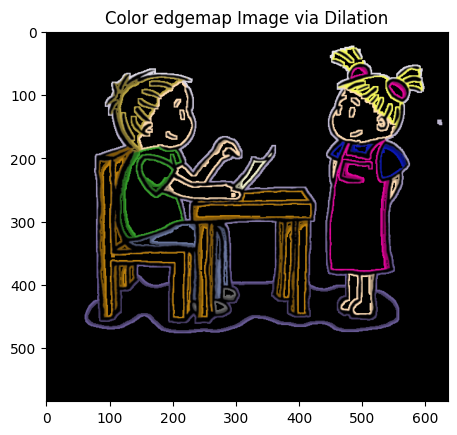

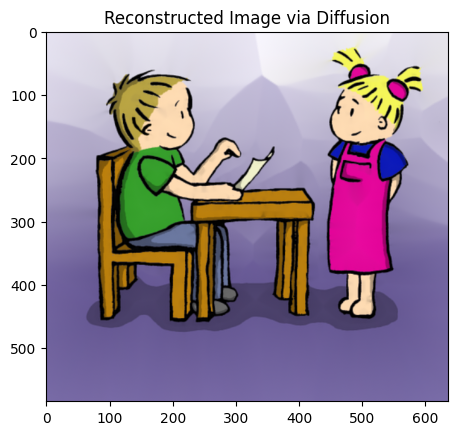

In [31]:
kernel = np.ones((5, 5), np.uint8)  # Adjust kernel size as needed
dilated_edges = cv2.dilate(edges, kernel, iterations=1)

color_near_edges = cv2.bitwise_and(image, image, mask=dilated_edges)

reconstructed_image = cv2.inpaint(colorized_edges, 255 - dilated_edges, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

plt.imshow(cv2.cvtColor(color_near_edges, cv2.COLOR_BGR2RGB))
plt.savefig("comic_orig_2_coloredge_dilation.png", dpi=300, bbox_inches='tight')
plt.title('Color edgemap Image via Dilation')
plt.show()

plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.savefig("comic_orig_2_reconstructed.png", dpi=300, bbox_inches='tight')
plt.title('Reconstructed Image via Diffusion')
plt.show()